Klasifikasi:
- Klasifikasi Random Forest dengan Logistic Regression
- Sebagai Metode Klasfikasi terbaik digunakan Logistic Regression

In [1]:
import pandas as pd
import numpy as np

df_property=pd.read_csv(r'C:\Users\lenovo\Downloads\Dataset UTS_Gasal 2425.csv')
df_property.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


In [2]:
df_property2=df_property.drop('price', axis=1)
df_property2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,Luxury


In [3]:
df_property2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   squaremeters       10000 non-null  int64 
 1   numberofrooms      10000 non-null  int64 
 2   hasyard            10000 non-null  object
 3   haspool            10000 non-null  object
 4   floors             10000 non-null  int64 
 5   citycode           10000 non-null  int64 
 6   citypartrange      10000 non-null  int64 
 7   numprevowners      10000 non-null  int64 
 8   made               10000 non-null  int64 
 9   isnewbuilt         10000 non-null  object
 10  hasstormprotector  10000 non-null  object
 11  basement           10000 non-null  int64 
 12  attic              10000 non-null  int64 
 13  garage             10000 non-null  int64 
 14  hasstorageroom     10000 non-null  object
 15  hasguestroom       10000 non-null  int64 
 16  category           10000 non-null  object

In [4]:
df_property2.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000


In [5]:
print("data null \n", df_property2.isnull().sum())
print("data kosong \n", df_property2.empty)
print("data nan \n", df_property2.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64
data kosong 
 False
data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
category             0
dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

x = df_property2.drop(columns=['category'], axis=1)
y = df_property2['category']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=72)

print(x_train.shape)
print(x_test.shape)

(7500, 16)
(2500, 16)


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

column_category = ['hasyard', 'haspool', 'isnewbuilt', 'hasstormprotector', 'hasstorageroom']

transform = make_column_transformer(
    (OneHotEncoder(), column_category), remainder='passthrough'
)


In [8]:
x_train_enc = transform.fit_transform(x_train)
x_test_enc = transform.fit_transform(x_test)

df_train_enc_x = pd.DataFrame(x_train_enc, columns=transform.get_feature_names_out())
df_test_enc_x = pd.DataFrame(x_test_enc, columns=transform.get_feature_names_out())

df_train_enc_x.head(10)
df_test_enc_x.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,22.0,19.0,71247.0,1.0,3.0,1996.0,3856.0,4186.0,765.0,4.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,32.0,26.0,90052.0,2.0,2.0,2004.0,8033.0,8013.0,983.0,9.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,78.0,57.0,10331.0,10.0,10.0,2019.0,3202.0,2431.0,787.0,10.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,98.0,84.0,8864.0,6.0,1.0,1990.0,5400.0,3533.0,875.0,6.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,19.0,84.0,82241.0,4.0,6.0,1995.0,8498.0,7376.0,985.0,5.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,82.0,25.0,99585.0,4.0,1.0,2011.0,637.0,8932.0,878.0,7.0
6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,41.0,1.0,85611.0,4.0,6.0,1994.0,7386.0,7266.0,805.0,9.0
7,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,22.0,57.0,79008.0,1.0,6.0,2006.0,1475.0,7576.0,276.0,10.0
8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,78.0,55.0,64053.0,1.0,2.0,2009.0,5454.0,7380.0,787.0,2.0
9,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,19.0,85.0,55537.0,10.0,8.0,2000.0,5004.0,7171.0,108.0,9.0


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

y_train = pd.DataFrame(y_train, columns=['category'])
y_test = pd.DataFrame(y_test, columns=['category'])

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

encoder = OneHotEncoder()
y_train_enc = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_enc = encoder.transform(y_test.reshape(-1, 1)).toarray()

df_train_enc = pd.DataFrame(y_train_enc, columns=encoder.get_feature_names_out())
df_test_enc = pd.DataFrame(y_test_enc, columns=encoder.get_feature_names_out())


In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

LR = LogisticRegression(solver='liblinear', max_iter=500)

pipe_LR = Pipeline(steps=[
    ('data scaling', StandardScaler()), 
    ('feature select', SelectKBest()),
    ('clf', LR)
])

params_LR = [
    {
        'data scaling': [StandardScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l2']
    },
    {
        'data scaling': [StandardScaler()],
        'feature select': [SelectPercentile()],
        'feature select__percentile': np.arange(20, 50),
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l2']
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l2']
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select': [SelectPercentile()],
        'feature select__percentile': np.arange(20, 50),
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l2']
    }
]

GSCV_LR = GridSearchCV(pipe_LR, params_LR, cv=5)

GSCV_LR.fit(x_train_enc, y_train)
print("GSCV training finished")

GSCV training finished


Best CV Score: 0.8677333333333334
Test Score: 0.8584
Best Model:  Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectKBest(k=4)),
                ('clf',
                 LogisticRegression(C=10, max_iter=500, solver='liblinear'))])


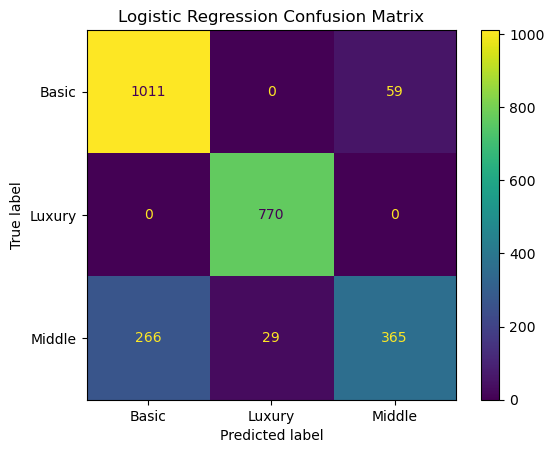

Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

       Basic       0.79      0.94      0.86      1070
      Luxury       0.96      1.00      0.98       770
      Middle       0.86      0.55      0.67       660

    accuracy                           0.86      2500
   macro avg       0.87      0.83      0.84      2500
weighted avg       0.86      0.86      0.85      2500



In [11]:
print("Best CV Score: {}".format(GSCV_LR.best_score_))
print("Test Score: {}".format(GSCV_LR.score(x_test_enc, y_test)))
print("Best Model: ", GSCV_LR.best_estimator_)

LR_pred = GSCV_LR.predict(x_test_enc)

cm_LR = confusion_matrix(y_test, LR_pred, labels=GSCV_LR.classes_)
disp_LR = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=GSCV_LR.classes_)
disp_LR.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Classification Report for Logistic Regression: \n", classification_report(y_test, LR_pred))


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipe_RF=[
    ('data scaling', StandardScaler()),
    ('feature select', SelectKBest()),
    ('clf', RandomForestClassifier(random_state=5, class_weight='balanced'))
]

params_grid_RF = [
    {
        'data scaling' : [StandardScaler()],
        'feature select__k' : np.arange(2,6),
        'clf__max_depth' : np.arange(4,5),
        'clf__n_estimators' : [100, 150]
    },
    {
        'data scaling' : [StandardScaler()],
        'feature select' : [SelectPercentile()],
        'feature select__percentile' : np.arange(20,50),
        'clf__max_depth' : np.arange(4,5),
        'clf__n_estimators' : [100, 150]
    },
    {
        'data scaling' : [MinMaxScaler()],
        'feature select__k' : np.arange(2,6),
        'clf__max_depth' : np.arange(4,5),
        'clf__n_estimators' : [100, 150]
    },
    {
        'data scaling' : [MinMaxScaler()],
        'feature select' : [SelectPercentile()],
        'feature select__percentile' : np.arange(20,50),
        'clf__max_depth' : np.arange(4,5),
        'clf__n_estimators' : [100, 150]
    }
]

estimator_RF = Pipeline(pipe_RF)

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

GSCV_RF = GridSearchCV(estimator_RF, params_grid_RF, cv=SKF, n_jobs=-1)

GSCV_RF.fit(x_train_enc, y_train)
print("GSCV training finished")

GSCV training finished


CV Score: 0.9997333333333334
Test Score: 0.9996
Best Mode:  Pipeline(steps=[('data scaling', MinMaxScaler()),
                ('feature select', SelectPercentile(percentile=46)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        n_estimators=150, random_state=5))])
Best Features:  Index(['onehotencoder__hasyard_no', 'onehotencoder__hasyard_yes',
       'onehotencoder__haspool_no', 'onehotencoder__haspool_yes',
       'onehotencoder__isnewbuilt_new', 'onehotencoder__isnewbuilt_old',
       'remainder__squaremeters', 'remainder__numberofrooms',
       'remainder__citycode', 'remainder__numprevowners'],
      dtype='object')


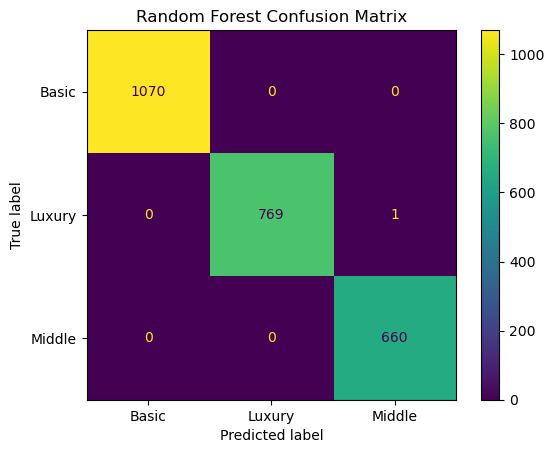

CLassification Report RF: 
               precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1070
      Luxury       1.00      1.00      1.00       770
      Middle       1.00      1.00      1.00       660

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [13]:
print("CV Score: {}".format(GSCV_RF.best_score_))

print("Test Score: {}".format(GSCV_RF.best_estimator_.score(x_test_enc, y_test)))

print("Best Mode: ", GSCV_RF.best_estimator_)

mask = GSCV_RF.best_estimator_.named_steps['feature select'].get_support()
print("Best Features: ", df_train_enc_x.columns[mask])

RF_pred = GSCV_RF.predict(x_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, RF_pred, labels=GSCV_RF.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF.classes_)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

print("CLassification Report RF: \n", classification_report(y_test, RF_pred))

In [14]:
import pickle

with open('LR_properti_model.pkl', 'wb') as r:
    pickle.dump((GSCV_LR),r)

print("Model LR berhasil disimpan")

Model LR berhasil disimpan
